C:\Users\abeer\AppData\Local\Temp\ipykernel_9056\3713453983.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass (g)'].fillna(df['mass (g)'].median(), inplace=True)
C:\Users\abeer\AppData\Local\Temp\ipykernel_9056\3713453983.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Random Forest:
Mean Absolute Error (MAE): 28069.85
R² Score: -0.0776

Gradient Boosting:
Mean Absolute Error (MAE): 27476.13
R² Score: -0.0346

XGBoost:
Mean Absolute Error (MAE): 25775.65
R² Score: -0.0318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 36527, number of used features: 3
[LightGBM] [Info] Start training from score 11634.784966

LightGBM:
Mean Absolute Error (MAE): 34887.26
R² Score: -0.0420

Performance Summary:
                             MAE  R² Score
Random Forest      28069.846896 -0.077649
Gradient Boosting  27476.128842 -0.034569
XGBoost            25775.652591 -0.031779
LightGBM           34887.255614 -0.041985


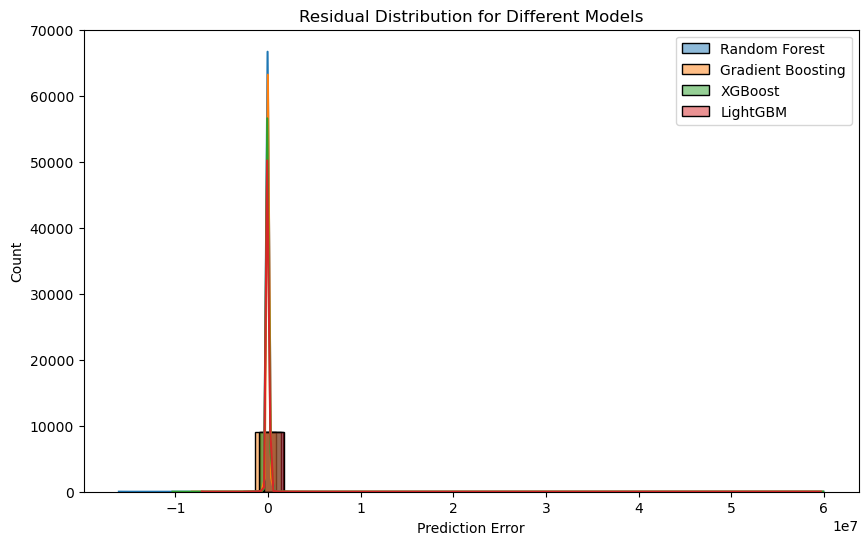

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Load the dataset
file_path = "Meteorite_Landings.csv"
df = pd.read_csv(file_path)

# Handling missing values
df['mass (g)'].fillna(df['mass (g)'].median(), inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['reclat'] = df.groupby('recclass')['reclat'].transform(lambda x: x.fillna(x.mean()))
df['reclong'] = df.groupby('recclass')['reclong'].transform(lambda x: x.fillna(x.mean()))
df.dropna(subset=['reclat', 'reclong'], inplace=True)

# Feature Selection
X_reg = df[['year', 'reclat', 'reclong']]
y_reg = df['mass (g)']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model Initialization
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

# Model Training and Evaluation
results = {}

for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    results[name] = {"MAE": mae, "R² Score": r2}
    
    print(f"\n{name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nPerformance Summary:\n", results_df)

# Residual Plot Comparison
plt.figure(figsize=(10,6))

for name, model in models.items():
    y_pred = model.predict(X_test_reg)
    sns.histplot(y_test_reg - y_pred, bins=30, kde=True, label=name, alpha=0.5)

plt.title("Residual Distribution for Different Models")
plt.xlabel("Prediction Error")
plt.legend()
plt.show()
